In [1]:
# !pip install  boto3 awscli

In [ ]:
import pandas as pd
import io

In [2]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
import findspark
findspark.init()
findspark.find()

In [ ]:
#configure aws info
!echo "[default]" > ~/.aws/credentials
!echo "aws_access_key_id = XXXXXXXXXX" >> ~/.aws/credentials
!echo "aws_secret_access_key = XXXXXXXXXXXXXXXX" >> ~/.aws/credentials


In [ ]:
!aws s3 ls

2024-12-05 02:46:23 big-data-project-dilip


In [ ]:
!aws s3 ls s3://big-data-project-dilip

2024-12-05 02:48:02  349463898 btcusd_1-min_data.csv


In [ ]:
import pyspark
from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

In [ ]:
AWS_ACCESS_KEY_ID='XXXXXXXXXXXXXXXXXXXXX'
AWS_SECRET_ACCESS_KEY='XXXXXXXXXXXXXXXXXXXXXXXXXXX'

In [ ]:
#config pyspark env
spark = SparkSession.builder \
    .appName("Read CSV from S3") \
    .config("spark.hadoop.fs.s3a.access.key", AWS_ACCESS_KEY_ID) \
    .config("spark.hadoop.fs.s3a.secret.key", AWS_SECRET_ACCESS_KEY) \
    .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .getOrCreate()

In [ ]:
s3_path = "s3a://big-data-project-dilip/btcusd_1-min_data.csv"


In [ ]:
!wget https://repo1.maven.org/maven2/org/apache/hadoop/hadoop-aws/3.2.0/hadoop-aws-3.2.0.jar
!wget https://repo1.maven.org/maven2/com/amazonaws/aws-java-sdk-bundle/1.11.375/aws-java-sdk-bundle-1.11.375.jar


--2024-12-13 20:41:52--  https://repo1.maven.org/maven2/org/apache/hadoop/hadoop-aws/3.2.0/hadoop-aws-3.2.0.jar
Resolving repo1.maven.org (repo1.maven.org)... 199.232.192.209, 199.232.196.209, 2a04:4e42:4c::209, ...
Connecting to repo1.maven.org (repo1.maven.org)|199.232.192.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 480674 (469K) [application/java-archive]
Saving to: ‘hadoop-aws-3.2.0.jar’

hadoop-aws-3.2.0.ja 100%[===================>] 469.41K   883KB/s    in 0.5s    

2024-12-13 20:41:53 (883 KB/s) - ‘hadoop-aws-3.2.0.jar’ saved [480674/480674]

--2024-12-13 20:41:53--  https://repo1.maven.org/maven2/com/amazonaws/aws-java-sdk-bundle/1.11.375/aws-java-sdk-bundle-1.11.375.jar
Resolving repo1.maven.org (repo1.maven.org)... 199.232.192.209, 199.232.196.209, 2a04:4e42:4c::209, ...
Connecting to repo1.maven.org (repo1.maven.org)|199.232.192.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98732349 (94M) [application/java-arc

In [ ]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars hadoop-aws-3.2.0.jar,aws-java-sdk-bundle-1.11.375.jar pyspark-shell'


In [ ]:
import boto3
from io import StringIO

In [ ]:
#use boto 3 for accessing data from aws
s3 = boto3.client('s3')

In [ ]:
bucket_name = 'big-data-project-dilip'
file_key = 'btcusd_1-min_data.csv'

response = s3.get_object(Bucket=bucket_name, Key=file_key)
csv_content = response['Body'].read().decode('utf-8')


In [ ]:
s3_url = f"s3://{bucket_name}/{file_key}"
s3_url

's3://big-data-project-dilip/btcusd_1-min_data.csv'

In [ ]:
s3_url = f"s3://{bucket_name}/{file_key}"
obj = s3.get_object(Bucket=bucket_name, Key=file_key)
data = obj['Body'].read().decode('utf-8')


In [ ]:
df_pandas = pd.read_csv(io.StringIO(data))
df = spark.createDataFrame(df_pandas)
df.show()
df.printSchema()

+------------+----+----+----+-----+------+
|   Timestamp|Open|High| Low|Close|Volume|
+------------+----+----+----+-----+------+
|1.32541206E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541212E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541218E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541224E9|4.58|4.58|4.58| 4.58|   0.0|
| 1.3254123E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541236E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541242E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541248E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541254E9|4.58|4.58|4.58| 4.58|   0.0|
| 1.3254126E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541266E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541272E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541278E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541284E9|4.58|4.58|4.58| 4.58|   0.0|
| 1.3254129E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541296E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541302E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541308E9|4.58|4.58|4.58| 4.58|   0.0|
|1.32541314E9|4.58|4.58|4.58| 4.58|   0.0|
| 1.3254132E9|4.58|4.58|4.58| 4.58|   0.0|
+----------

In [ ]:
num_rows = df.count()
num_columns = len(df.columns)
print(f"Shape of the DataFrame: ({num_rows}, {num_columns})")

Shape of the DataFrame: (6723281, 6)


Missing Values in the Dataset:

In [ ]:
from pyspark.sql.functions import col, isnan, when, count
total_rows = df.count()
null_percentages = (
    df.select([(count(when(col(c).isNull() | isnan(c), c)) / total_rows * 100).alias(c) for c in df.columns]))
print("Percentage of Null Values in Each Column:")
null_percentages.show()

Percentage of Null Values in Each Column:
+--------------------+----+----+---+-----+------+
|           Timestamp|Open|High|Low|Close|Volume|
+--------------------+----+----+---+-----+------+
|1.487369039015326E-5| 0.0| 0.0|0.0|  0.0|   0.0|
+--------------------+----+----+---+-----+------+



In [ ]:
from pyspark.sql.functions import from_unixtime, year, month, dayofmonth

Convert Unix Timestamp into readable Date

In [ ]:
df_transformed = df.withColumn("Datetime", from_unixtime("Timestamp")) \
                   .withColumn("Year", year(from_unixtime("Timestamp"))) \
                   .withColumn("Month", month(from_unixtime("Timestamp"))) \
                   .withColumn("Day", dayofmonth(from_unixtime("Timestamp")))

In [ ]:
df_transformed.show()

+------------+----+----+----+-----+------+-------------------+----+-----+---+
|   Timestamp|Open|High| Low|Close|Volume|           Datetime|Year|Month|Day|
+------------+----+----+----+-----+------+-------------------+----+-----+---+
|1.32541206E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:01:00|2012|    1|  1|
|1.32541212E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:02:00|2012|    1|  1|
|1.32541218E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:03:00|2012|    1|  1|
|1.32541224E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:04:00|2012|    1|  1|
| 1.3254123E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:05:00|2012|    1|  1|
|1.32541236E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:06:00|2012|    1|  1|
|1.32541242E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:07:00|2012|    1|  1|
|1.32541248E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:08:00|2012|    1|  1|
|1.32541254E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:09:00|2012|    1|  1|
| 1.3254126E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:10:00|20

In [3]:
#Insights from the Data:

1. Monthly Average Closing Price

In [ ]:
from pyspark.sql.functions import avg

monthly_avg_close = df_transformed.groupBy("Year", "Month").agg(avg("Close").alias("Avg_Close"))
monthly_avg_close.show()

+----+-----+------------------+
|Year|Month|         Avg_Close|
+----+-----+------------------+
|2012|   10|11.630673163082575|
|2015|    2| 233.8848454861181|
|2017|    3|1132.6591767473308|
|2014|    4| 462.5960842592671|
|2015|   12|422.15270810932293|
|2016|    7| 660.7412473118395|
|2016|   11| 722.9622171997954|
|2012|    8| 10.92016935483949|
|2013|    2|25.707080109127205|
|2012|    4| 4.980315277777693|
|2012|   12|13.146735215053406|
|2014|   10| 364.2635499552096|
|2016|    5|459.49873342293984|
|2014|   12| 343.1390557795864|
|2013|    9|124.89339050926257|
|2013|   10|152.31140501792743|
|2014|    5| 484.6043272849413|
|2016|    2|  401.459839080472|
|2017|    7|2492.8033066756175|
|2013|   12| 797.2092573924576|
+----+-----+------------------+
only showing top 20 rows



In [ ]:
monthly_avg_close.write.csv("monthly_avg_close.csv", header=True, mode="overwrite")

2. Total Volume Traded Per Month

In [ ]:
monthly_volume = df_transformed.groupBy("Year", "Month").agg({"Volume": "sum"})
monthly_volume.show()

+----+-----+------------------+
|Year|Month|       sum(Volume)|
+----+-----+------------------+
|2012|   10| 83104.04747408001|
|2015|    2|  351708.969556257|
|2017|    3| 321058.7148016618|
|2014|    4|517371.75097255554|
|2015|   12|422649.12320094294|
|2016|    7|118452.46361068907|
|2016|   11| 154162.8690078005|
|2012|    8| 82848.67116894989|
|2013|    2|123510.87774068979|
|2012|    4|16484.167772440003|
|2012|   12| 91377.29088790013|
|2014|   10| 599895.4417664655|
|2016|    5|135188.60074122954|
|2014|   12| 294441.8571654428|
|2013|    9|322672.50941772043|
|2013|   10| 625096.5716852888|
|2014|    5|302311.93173702917|
|2016|    2|216664.02664584914|
|2017|    7| 442045.6083083977|
|2013|   12| 953353.1568645568|
+----+-----+------------------+
only showing top 20 rows



In [ ]:
monthly_volume.write.csv("monthly_volume.csv", header=True, mode="overwrite")

3. Top 10 Days with Highest Volume

In [ ]:
daily_volume = df_transformed.groupBy("Year", "Month", "Day").agg({"Volume": "sum"}) \
                             .orderBy("sum(Volume)", ascending=False)
daily_volume.show(10)

+----+-----+---+------------------+
|Year|Month|Day|       sum(Volume)|
+----+-----+---+------------------+
|2013|   12| 18|   127286.48653306|
|2015|    1| 14|115814.46241601992|
|2014|    2| 25|112848.33758712989|
|2015|   11|  4|100714.05054385003|
|2013|   12|  7| 92891.97224274017|
|2015|    1| 15| 89350.93392063005|
|2013|   11| 19| 84192.38187954016|
|2015|   11|  5| 80972.91950993001|
|2014|   10|  6| 79712.11416376993|
|2015|   11|  3| 76952.78107203002|
+----+-----+---+------------------+
only showing top 10 rows



In [ ]:
daily_volume.write.csv("daily_volume.csv", header=True, mode="overwrite")

4. Monthly High and Low Prices

In [ ]:
from pyspark.sql.functions import max, min

monthly_high_low = df_transformed.groupBy("Year", "Month") \
    .agg(max("High").alias("Monthly_High"), min("Low").alias("Monthly_Low"))
monthly_high_low.show()

+----+-----+------------+-----------+
|Year|Month|Monthly_High|Monthly_Low|
+----+-----+------------+-----------+
|2012|   10|       12.99|        9.5|
|2015|    2|      267.92|     208.48|
|2017|    3|      1350.0|     891.33|
|2014|    4|       548.0|     339.79|
|2015|   12|       467.8|     348.64|
|2016|    7|      704.99|      605.5|
|2016|   11|      755.07|     670.32|
|2012|    8|       16.41|        7.1|
|2013|    2|       34.24|       19.5|
|2012|    4|        5.43|       4.69|
|2012|   12|       13.94|      12.24|
|2014|   10|      417.99|      275.0|
|2016|    5|       548.5|      435.0|
|2014|   12|       383.0|     304.99|
|2013|    9|      134.95|      115.0|
|2013|   10|       206.6|       85.0|
|2014|    5|       629.4|     420.27|
|2016|    2|      447.99|      364.7|
|2017|    7|      2938.0|     1830.0|
|2013|   12|     1153.27|     382.21|
+----+-----+------------+-----------+
only showing top 20 rows



In [ ]:
monthly_high_low.write.csv("monthly_high_low.csv", header=True, mode="overwrite")

5. Days with Maximum Price Volatility

Price volatility is calculated as the difference between the High and Low prices for the day.

In [ ]:
from pyspark.sql.functions import abs

daily_volatility = df_transformed.withColumn("Volatility", abs(df_transformed["High"] - df_transformed["Low"])) \
                                 .groupBy("Year", "Month", "Day") \
                                 .agg({"Volatility": "max"}) \
                                 .orderBy("max(Volatility)", ascending=False)

daily_volatility.show(10)

+----+-----+---+------------------+
|Year|Month|Day|   max(Volatility)|
+----+-----+---+------------------+
|2021|   10| 11| 4747.760000000002|
|2022|    1| 24|           4664.68|
|2021|   10| 28| 4380.379999999997|
|2021|   10| 18|3078.4100000000035|
|2021|    4| 14| 3004.760000000002|
|2021|   12|  4|2985.9100000000035|
|2021|    7| 26|2622.3399999999965|
|2024|    2| 28|            2532.0|
|2021|   11|  3|2508.0800000000017|
|2021|    4| 18|2457.1399999999994|
+----+-----+---+------------------+
only showing top 10 rows



In [ ]:
daily_volatility.write.csv("daily_volatility.csv", header=True, mode="overwrite")

4. Outlier Removal

Remove Outliers in Closing Prices Using a 3-Sigma Rule

In [ ]:
from pyspark.sql.functions import mean, stddev
stats = df_transformed.select(mean("Close").alias("mean"), stddev("Close").alias("stddev")).collect()
mean_close = stats[0]["mean"]
stddev_close = stats[0]["stddev"]

# Define upper and lower bounds for outlier removal
lower_bound = mean_close - 3 * stddev_close
upper_bound = mean_close + 3 * stddev_close

# Filter out outliers
df_filtered = df_transformed.filter((df_transformed["Close"] >= lower_bound) & (df_transformed["Close"] <= upper_bound))
df_filtered.show(5)


+------------+----+----+----+-----+------+-------------------+----+-----+---+
|   Timestamp|Open|High| Low|Close|Volume|           Datetime|Year|Month|Day|
+------------+----+----+----+-----+------+-------------------+----+-----+---+
|1.32541206E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:01:00|2012|    1|  1|
|1.32541212E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:02:00|2012|    1|  1|
|1.32541218E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:03:00|2012|    1|  1|
|1.32541224E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:04:00|2012|    1|  1|
| 1.3254123E9|4.58|4.58|4.58| 4.58|   0.0|2012-01-01 10:05:00|2012|    1|  1|
+------------+----+----+----+-----+------+-------------------+----+-----+---+
only showing top 5 rows



In [ ]:
df = df_filtered

In [ ]:
# Resample to daily frequency
from pyspark.sql.functions import from_unixtime, to_date, col
df_with_date = df.withColumn("Date", to_date(from_unixtime(col("Timestamp"))))
df_daily = df_with_date.groupBy("Date").mean()
df_daily.show()

+----------+--------------+------------------+------------------+------------------+------------------+-------------------+---------+----------+--------+
|      Date|avg(Timestamp)|         avg(Open)|         avg(High)|          avg(Low)|        avg(Close)|        avg(Volume)|avg(Year)|avg(Month)|avg(Day)|
+----------+--------------+------------------+------------------+------------------+------------------+-------------------+---------+----------+--------+
|2012-04-17|  1.33466397E9| 4.981381944444357| 4.981381944444357| 4.981381944444357| 4.981381944444357|0.24306071589583336|   2012.0|       4.0|    17.0|
|2012-10-06|  1.34952477E9|12.499958333333456|12.500180555555678|12.499777777777899|12.500062500000121| 1.6069834545624995|   2012.0|      10.0|     6.0|
|2013-01-22|  1.35885597E9| 16.81814583333336|16.818993055555573| 16.81704861111114|16.818020833333353| 2.1121233013750005|   2013.0|       1.0|    22.0|
|2013-03-26|  1.36429917E9| 77.76075694444421| 77.78238194444421| 77.7417152

In [ ]:
# Step 3: Sort by Date
df_sorted = df_daily.orderBy("Date")
df_sorted.show()

+----------+--------------+------------------+------------------+------------------+------------------+--------------------+---------+----------+--------+
|      Date|avg(Timestamp)|         avg(Open)|         avg(High)|          avg(Low)|        avg(Close)|         avg(Volume)|avg(Year)|avg(Month)|avg(Day)|
+----------+--------------+------------------+------------------+------------------+------------------+--------------------+---------+----------+--------+
|      NULL|          NULL|           57854.0|           57864.0|           57835.0|           57835.0|          1.35346619|     NULL|      NULL|    NULL|
|2012-01-01|   1.3254372E9| 4.645697258641246| 4.645697258641246| 4.645697258641246| 4.645697258641246|0.011918951132300357|   2012.0|       1.0|     1.0|
|2012-01-02|  1.32550557E9|4.9750000000000005|4.9750000000000005|4.9750000000000005|4.9750000000000005|0.007013888888888889|   2012.0|       1.0|     2.0|
|2012-01-03|  1.32559197E9| 5.085499999999979| 5.085499999999979| 5.08

In [ ]:
import matplotlib.pyplot as plt
df_cleaned = df_sorted.dropna()
df_pandas = df_cleaned.toPandas()


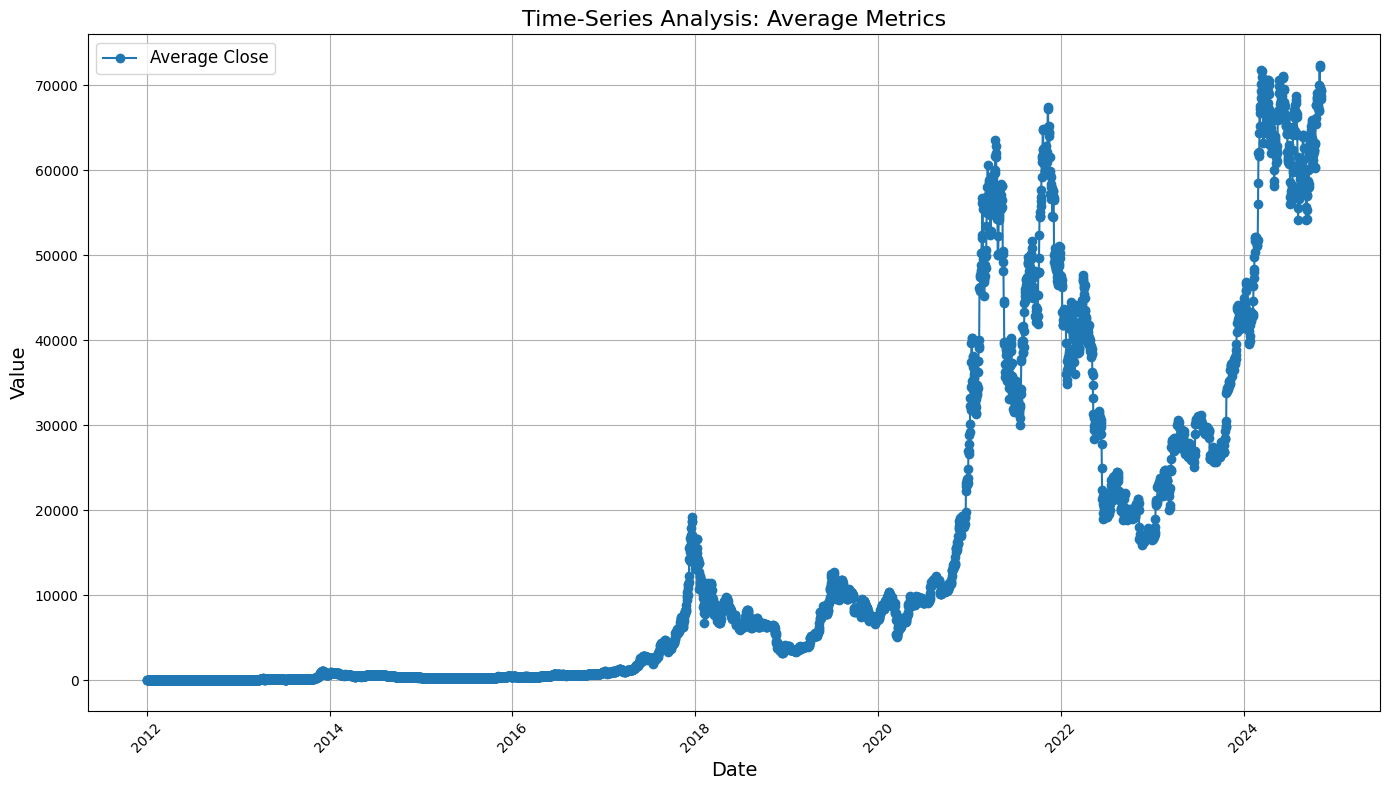

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df_pandas["Date"], df_pandas["avg(Close)"], label="Average Close", marker="o")
plt.title("Time-Series Analysis: Average Metrics", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
from pyspark.sql.functions import col, when, avg
from pyspark.sql.window import Window
# Define a window specification for rolling calculations
window_spec_sma1 = Window.orderBy("Date").rowsBetween(-9, 0)  # 10-day window
window_spec_sma2 = Window.orderBy("Date").rowsBetween(-59, 0)  # 60-day window

# Step 1: Compute Short-term SMA (10-day rolling average)
df_transformed = df_cleaned.withColumn("SMA1", avg(col('avg(Close)')).over(window_spec_sma1))

# Step 2: Compute Long-term SMA (60-day rolling average)
df_transformed = df_transformed.withColumn("SMA2", avg(col("avg(Close)")).over(window_spec_sma2))

# Step 3: Generate Signal (1.0 for Buy, 0.0 for Sell)
df_transformed = df_transformed.withColumn(
    "signal", when(col("SMA1") > col("SMA2"), 1.0).otherwise(0.0)
)

df_transformed.select("Date", "avg(Close)", "SMA1", "SMA2", "signal").show(10)

+----------+------------------+------------------+------------------+------+
|      Date|        avg(Close)|              SMA1|              SMA2|signal|
+----------+------------------+------------------+------------------+------+
|2012-01-01| 4.645697258641246| 4.645697258641246| 4.645697258641246|   0.0|
|2012-01-02|4.9750000000000005|4.8103486293206235|4.8103486293206235|   0.0|
|2012-01-03| 5.085499999999979| 4.902065752880408| 4.902065752880408|   0.0|
|2012-01-04| 5.170395833333274| 4.969148272993625| 4.969148272993625|   0.0|
|2012-01-05| 5.954361111111107| 5.166190840617121| 5.166190840617121|   0.0|
|2012-01-06| 6.620333333333143|5.4085479227364575|5.4085479227364575|   0.0|
|2012-01-07| 6.047777777777754| 5.499866473456643| 5.499866473456643|   0.0|
|2012-01-08| 6.819444444444476| 5.664813719830122| 5.664813719830122|   0.0|
|2012-01-09|6.8164513888887885|  5.79277346083664|  5.79277346083664|   0.0|
|2012-01-10| 6.385722222222216| 5.852068336975198| 5.852068336975198|   0.0|

In [ ]:
# Count the number of 0s and 1s in the 'signal' column
signal_counts = df_transformed.groupBy("signal").count()
signal_counts.show()


+------+-----+
|signal|count|
+------+-----+
|   0.0| 1980|
|   1.0| 2714|
+------+-----+



In [ ]:
df_transformed.show(10)

+----------+--------------+------------------+------------------+------------------+------------------+--------------------+---------+----------+--------+------------------+------------------+------+
|      Date|avg(Timestamp)|         avg(Open)|         avg(High)|          avg(Low)|        avg(Close)|         avg(Volume)|avg(Year)|avg(Month)|avg(Day)|              SMA1|              SMA2|signal|
+----------+--------------+------------------+------------------+------------------+------------------+--------------------+---------+----------+--------+------------------+------------------+------+
|2012-01-01|   1.3254372E9| 4.645697258641246| 4.645697258641246| 4.645697258641246| 4.645697258641246|0.011918951132300357|   2012.0|       1.0|     1.0| 4.645697258641246| 4.645697258641246|   0.0|
|2012-01-02|  1.32550557E9|4.9750000000000005|4.9750000000000005|4.9750000000000005|4.9750000000000005|0.007013888888888889|   2012.0|       1.0|     2.0|4.8103486293206235|4.8103486293206235|   0.0|


In [ ]:
from pyspark.sql.functions import year, month, dayofmonth
bitcoin= df_transformed.select(
    "Date",
    "avg(Low)",
    "avg(Open)",
    "avg(High)",
    "avg(Close)",
    "avg(Volume)",
    "SMA1",
    "SMA2",
    "signal"
)

bitcoin = bitcoin.withColumn("Year", year("Date")) \
       .withColumn("Month", month("Date")) \
       .withColumn("Day", dayofmonth("Date"))

bitcoin.show(10)


+----------+------------------+------------------+------------------+------------------+--------------------+------------------+------------------+------+----+-----+---+
|      Date|          avg(Low)|         avg(Open)|         avg(High)|        avg(Close)|         avg(Volume)|              SMA1|              SMA2|signal|Year|Month|Day|
+----------+------------------+------------------+------------------+------------------+--------------------+------------------+------------------+------+----+-----+---+
|2012-01-01| 4.645697258641246| 4.645697258641246| 4.645697258641246| 4.645697258641246|0.011918951132300357| 4.645697258641246| 4.645697258641246|   0.0|2012|    1|  1|
|2012-01-02|4.9750000000000005|4.9750000000000005|4.9750000000000005|4.9750000000000005|0.007013888888888889|4.8103486293206235|4.8103486293206235|   0.0|2012|    1|  2|
|2012-01-03| 5.085499999999979| 5.085499999999979| 5.085499999999979| 5.085499999999979| 0.07436477841666665| 4.902065752880408| 4.902065752880408|   

In [ ]:
# Rename columns for better readability
bitcoin = bitcoin.withColumnRenamed("avg(Open)", "Avg_Open") \
       .withColumnRenamed("avg(High)", "Avg_High") \
       .withColumnRenamed("avg(Low)", "Avg_Low") \
       .withColumnRenamed("avg(Volume)", "Avg_Volume")\
       .withColumnRenamed("avg(Close)", "Avg_Close") \
# Show the updated DataFrame
bitcoin.show(10)


+----------+------------------+------------------+------------------+------------------+--------------------+------------------+------------------+------+----+-----+---+
|      Date|           Avg_Low|          Avg_Open|          Avg_High|         Avg_Close|          Avg_Volume|              SMA1|              SMA2|signal|Year|Month|Day|
+----------+------------------+------------------+------------------+------------------+--------------------+------------------+------------------+------+----+-----+---+
|2012-01-01| 4.645697258641246| 4.645697258641246| 4.645697258641246| 4.645697258641246|0.011918951132300357| 4.645697258641246| 4.645697258641246|   0.0|2012|    1|  1|
|2012-01-02|4.9750000000000005|4.9750000000000005|4.9750000000000005|4.9750000000000005|0.007013888888888889|4.8103486293206235|4.8103486293206235|   0.0|2012|    1|  2|
|2012-01-03| 5.085499999999979| 5.085499999999979| 5.085499999999979| 5.085499999999979| 0.07436477841666665| 4.902065752880408| 4.902065752880408|   

In [ ]:
# Register the DataFrame as a temporary SQL table
bitcoin.createOrReplaceTempView("bitcoin")

1. Identify the Days with the Highest Average Volume

In [ ]:
query_1 = spark.sql("""
    SELECT Date, Avg_Volume
    FROM bitcoin
    ORDER BY Avg_Volume DESC
    LIMIT 10
""")
query_1.write.csv("average_vol.csv", header=True, mode="overwrite")
query_1.show()


+----------+------------------+
|      Date|        Avg_Volume|
+----------+------------------+
|2013-12-18| 88.39339342573611|
|2015-01-14| 80.42671001112494|
|2014-02-25| 78.36690110217354|
|2015-11-04| 69.94031287767363|
|2013-12-07| 64.50831405745845|
|2015-01-15|  62.0492596671042|
|2013-11-19|58.466931860791775|
|2015-11-05| 56.23119410411807|
|2014-10-06| 55.35563483595134|
|2015-11-03| 53.43943130002084|
+----------+------------------+



2. Calculate Month-over-Month Average Closing Price Growth

In [ ]:
query_2 = spark.sql("""
    SELECT
        YEAR(Date) AS Year,
        MONTH(Date) AS Month,
        AVG (Avg_Close)
    FROM bitcoin
    GROUP BY YEAR(Date), MONTH(Date)
    ORDER BY Year, Month
""")
query_2.write.csv("month_over_month.csv", header=True, mode="overwrite")
query_2.show()



+----+-----+------------------+
|Year|Month|    avg(Avg_Close)|
+----+-----+------------------+
|2012|    1| 6.232117250278735|
|2012|    2| 5.234546695402287|
|2012|    3| 4.954453181003575|
|2012|    4| 4.980315277777753|
|2012|    5| 5.041769041218648|
|2012|    6| 5.959802314814821|
|2012|    7| 7.778318772401423|
|2012|    8|10.920169354838718|
|2012|    9|11.397910416666642|
|2012|   10|11.630673163082465|
|2012|   11|11.321196346618324|
|2012|   12|13.146735215053798|
|2013|    1| 15.26112858422943|
|2013|    2|25.707080109126988|
|2013|    3| 56.70915031362007|
|2013|    4|127.20942013888893|
|2013|    5|117.81836155913972|
|2013|    6|105.73322268518532|
|2013|    7| 85.38897535842294|
|2013|    8|103.23418525985662|
+----+-----+------------------+
only showing top 20 rows



In [ ]:
bitcoin.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Avg_Low: double (nullable = true)
 |-- Avg_Open: double (nullable = true)
 |-- Avg_High: double (nullable = true)
 |-- Avg_Close: double (nullable = true)
 |-- Avg_Volume: double (nullable = true)
 |-- SMA1: double (nullable = true)
 |-- SMA2: double (nullable = true)
 |-- signal: double (nullable = false)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)



3. Find the Top 5 Days with the Highest Price Volatility

In [ ]:
query_3 = spark.sql("""
    SELECT
        Date,
        (Avg_High - Avg_Low) AS Volatility
    FROM bitcoin
    ORDER BY Volatility DESC
    LIMIT 5
""")
query_3.write.csv("highest_volatility.csv", header=True, mode="overwrite")
query_3.show()

+----------+------------------+
|      Date|        Volatility|
+----------+------------------+
|2021-02-23| 209.6799652778791|
|2021-05-19| 207.7766736110425|
|2021-01-11|196.13825000001088|
|2021-05-20|177.53968055564474|
|2024-08-05| 162.9416666666657|
+----------+------------------+



4. Analyze the Average Close Price by Signal (Buy or Sell)

In [ ]:
query_4 = spark.sql("""
    SELECT signal, AVG(Avg_Close) as Avg_Close
    FROM bitcoin
    GROUP BY signal
    ORDER BY signal
""")
query_4.write.csv("avg_close_by_signal.csv", header=True, mode="overwrite")
query_4.show()

+------+------------------+
|signal|         Avg_Close|
+------+------------------+
|   0.0| 14522.95077594446|
|   1.0|14641.298888375683|
+------+------------------+



5. Determine Average High and Low Prices for Each Month

In [ ]:
query_5 = spark.sql("""
    SELECT YEAR(Date) AS Year, MONTH(Date) AS Month, AVG(Avg_High) AS Avg_High, AVG(Avg_Low) AS Avg_Low
    FROM bitcoin
    GROUP BY YEAR(Date), MONTH(Date)
    ORDER BY Year, Month
""")
query_5.write.csv("avg_high_low_by_month.csv", header=True, mode="overwrite")
query_5.show()

+----+-----+------------------+------------------+
|Year|Month|          Avg_High|           Avg_Low|
+----+-----+------------------+------------------+
|2012|    1| 6.232149060314576| 6.232061918737517|
|2012|    2| 5.234590038314165| 5.234526340996157|
|2012|    3|  4.95449126344085| 4.954436603942641|
|2012|    4| 4.980339351851827| 4.980292129629603|
|2012|    5| 5.041785394265243| 5.041759856630836|
|2012|    6|5.9598763888888975| 5.959721064814821|
|2012|    7| 7.778474238351243| 7.778117831541208|
|2012|    8|10.921000224014344|10.919631496415777|
|2012|    9|11.398095138888866|11.397714814814794|
|2012|   10| 11.63096841397852|11.630384184587841|
|2012|   11|11.321442673107857| 11.32105107689208|
|2012|   12|13.146929211469573|13.146575044802903|
|2013|    1|15.261499327957022|15.260730958781396|
|2013|    2|25.708068700396833|25.706108878968262|
|2013|    3| 56.72128494623658|  56.6964872311828|
|2013|    4|127.38757800925929|127.01545925925932|
|2013|    5|117.93066151433689|

In [ ]:
bitcoin.write.csv("bitcoin_processed.csv", header=True, mode="overwrite")

In [ ]:
!rm -rf /content/

In [ ]:
import os
import shutil
from google.colab import files
directory_to_zip = "/content"
zip_file_path = "/content/colab_files.zip"
shutil.make_archive(base_name=zip_file_path.replace(".zip", ""), format="zip", root_dir=directory_to_zip)
print(f"Files in {directory_to_zip} have been zipped to {zip_file_path}")
files.download(zip_file_path)

Files in /content have been zipped to /content/colab_files.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>